<a href="https://colab.research.google.com/github/leshless/study/blob/main/python_algebra/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from sympy import linsolve, Matrix, S, Symbol, symbols, linear_eq_to_matrix,\
Eq, zeros, ones, latex
from IPython.display import Latex

# Занятие 5
# Алгебра

##  Прямые и плоскости в пространстве. Уравнения прямых и  плоскостей.
### Задание 1.
Определить, пересекаются ли плоскости (все сразу). Если пересекаются, найти точку пересечения.

Составить СЛАУ в виде списка уравнений, решить с помощью linsolve.

$-8x+5y-2z+28=0$

$-11x-10y-16z+71=0$

$-7x+3y+8z-27=0$.

In [ ]:
x, y, z = symbols("x y z")

sys = [
    Eq(-8*x + 5*y - 2*z + 28, 0),
    Eq(-11*x - 10*y - 16*z + 71, 0),
    Eq(-7*x + 3*y + 8*z - 27, 0),
]

sol = linsolve(sys, (x, y, z))
display(sol)

NameError: name 'sympy' is not defined

### Задание 2.
Найти точку пересечения прямой, проходящей через точки $A(-3,5,1)$ и $B(5,2,-3)$ и плоскости, в которой лежат точки
$K(4,3,0)$, $M(2,4,-2)$ и $N(-2,2,-1)$.

In [ ]:
A, B, C = symbols("A B C")

M = Matrix([
  [4, 3, 0, -1],
  [2, 4, -2, -1],
  [-2, 2, -1, -1]
])

A, B, C = list(linsolve(M, (A, B, C)))[0]

x, y, z = symbols("x y z")
t = symbols("t")

K = Matrix([-3, 5, 1])
M = Matrix([5, 2, -3])

sys = [
    Eq(A*x + B*y + C*z + 1, 0),
    Eq(x, t*(M[0] - K[0]) + K[0]),
    Eq(y, t*(M[1] - K[1]) + K[1]),
    Eq(z, t*(M[2] - K[2]) + K[2]),
]

x, y, z, t = list(linsolve(sys, (x, y, z, t)))[0]

display((x, y, z))

(67/43, 283/86, -55/43)

### Задание 3.
Составить параметрические уравнения прямой, являющейся линией пересечения плоскостей $𝑦+2𝑧−4=0$ и $4𝑥+3𝑦+2𝑧−4=0$.

Указание: составить СЛАУ из уравнений плоскостей, воспользоваться linsolve(), заменить переменную в полученном решении на параметр t и составить СЛАУ из параметрических уравнений.

In [ ]:
x, y, z = symbols("x y z")
t = symbols("t")

sys = [
    Eq(y + 2*z - 4, 0),
    Eq(4*x + 3*y + 2*z - 4, 0)
]

sol = list(linsolve(sys, (x, y, z)).subs(z, t))[0]

sys = [

       Eq(x, sol[0]),
    Eq(y, sol[1]),
    Eq(z, sol[2])
]

display(*sys)

Eq(x, t - 2)

Eq(y, 4 - 2*t)

Eq(z, t)

###  Задание 4.
Прямая задана параметрическими уравнениями:
$$
\left\{\begin{matrix}
x=2+5t\\
y=-1-2t\\
z=4-3t
\end{matrix}\right..
$$
Представить прямую в виде линии пересечения двух плоскостей, одна из которых проходит через начало координат, а вторая плоскость перпендикулярна первой плоскости. Вывести на экран уравнения плоскостей.

Указание: составить параметрические уравнения прямой в виде списка правых частей уравнений, затем по образцу Примера 5 составить уравнение плоскости, проходящей через начало координат (по трем точкам). Для составления второй плоскости заметим, что вектор нормали к первой плоскости и любой вектор прямой параллельны второй плоскости, поэтому можно применить формулу 4 уравнения плоскости.
Вектор нормали можно составить вручную, глядя на уравнение первой плоскости.

In [28]:
t = symbols("t")
x, y, z = symbols("x y z")

sys = Matrix([
    2 + 5*t,
    -1 - 2*t,
    4 - 3*t,
])

P1 = sys.subs(t, 1).transpose()
P2 = sys.subs(t, 2).transpose()
M = P1.col_join(P2).row_join(zeros(2, 1))

# plane 1
A, B, C = symbols("A B C")
A, B, C = list(linsolve(M, (A, B, C)).subs(C, 1))[0]
display(Eq(A*x + B*y + C*z, 0))

# plane 2
N = Matrix([A, B, C]).transpose()
P3 = P1 + N
M = P1.col_join(P2).col_join(P3).row_join(ones(3, 1) * (-1))

A, B, C, D = symbols("A B C D")
A, B, C, D = list(linsolve(M, (A, B, C, D)).subs(D, 1))[0]
display(Eq(A*x + B*y + C*z + D, 0))


Eq(11*x + 26*y + z, 0)

Eq(-2*x/21 + y/21 - 4*z/21 + 1, 0)

###  Задание 5*.
Считать данные из файла 'points_task_5.xlsx'. Для каждой тройки точек из файла, не лежащих на одной прямой, вывести на экран название плоскости, состоящее из имен точек в алфавитном порядке, и уравнение плоскости, определяемой этой тройкой точек.

In [24]:
from google.colab import files
import pandas as pd

# uploaded = files.upload()

x, y, z = symbols("x y z")

points_table = pd.read_excel('points.xlsx', index_col=0)
coords = points_table.to_numpy()
names = points_table.index

n = len(coords)

for i in range(0, n):
  for j in range(i+1, n):
    for k in range(j+1, n):
      P1 = Matrix(list(coords[i])).transpose()
      P2 = Matrix(list(coords[j])).transpose()
      P3 = Matrix(list(coords[k])).transpose()

      M = Matrix([P1, P2, P3])

      if M.rank() != 3:
        continue

      M = M.row_join(ones(3, 1) * -1)

      A, B, C, D = symbols("A B C D")
      A, B, C, D = list(linsolve(M, (A, B, C, D)).subs(D, 1))[0]

      print(f"Equation of plane {names[i]}{names[j]}{names[k]}:")
      display(Eq(A*x + B*y + C*z + D, 0))




Equation of plane ABC:


Eq(-431*x/3727 + 1960*y/3727 - 2474*z/3727 + 1, 0)

Equation of plane ABD:


Eq(-61*x/1195 + 112*y/1195 - 21*z/239 + 1, 0)

Equation of plane ABE:


Eq(-3073*x/73027 + 2464*y/73027 - 579*z/73027 + 1, 0)

Equation of plane ABF:


Eq(-4663*x/115731 + 40*y/1837 + 928*z/115731 + 1, 0)

Equation of plane ABG:


Eq(-337*x/7630 + 26*y/545 - 81*z/3052 + 1, 0)

Equation of plane ABH:


Eq(-3116*x/78369 + 476*y/26123 + 1999*z/156738 + 1, 0)

Equation of plane ABK:


Eq(-211*x/2307 + 280*y/769 - 1034*z/2307 + 1, 0)

Equation of plane ABM:


Eq(-247*x/1019 + 1400*y/1019 - 1828*z/1019 + 1, 0)

Equation of plane ACD:


Eq(-269*x/6981 + 160*y/6981 - 50*z/2327 + 1, 0)

Equation of plane ACE:


Eq(-2200*x/59517 + 755*y/59517 - 167*z/19839 + 1, 0)

Equation of plane ACF:


Eq(-1608*x/46771 - 195*y/46771 + 613*z/46771 + 1, 0)

Equation of plane ACG:


Eq(-1797*x/48425 + 132*y/9685 - 466*z/48425 + 1, 0)

Equation of plane ACH:


Eq(-4269*x/126566 - 1065*y/126566 + 2345*z/126566 + 1, 0)

Equation of plane ACK:


Eq(-57*x/577 + 240*y/577 - 302*z/577 + 1, 0)

Equation of plane ACM:


Eq(-271*x/3317 + 1010*y/3317 - 1264*z/3317 + 1, 0)

Equation of plane ADE:


Eq(-191*x/5293 + 48*y/5293 - 45*z/5293 + 1, 0)

Equation of plane ADF:


Eq(-731*x/23167 - 384*y/23167 + 360*z/23167 + 1, 0)

Equation of plane ADG:


Eq(-44*x/1235 + 8*y/1235 - 3*z/494 + 1, 0)

Equation of plane ADH:


Eq(-472*x/15533 - 360*y/15533 + 675*z/31066 + 1, 0)

Equation of plane ADK:


Eq(-191*x/3079 + 480*y/3079 - 450*z/3079 + 1, 0)

Equation of plane ADM:


Eq(-461*x/10417 + 576*y/10417 - 540*z/10417 + 1, 0)

Equation of plane AEF:


Eq(-872*x/15259 + 1461*y/15259 - 99*z/15259 + 1, 0)

Equation of plane AEG:


Eq(-13*x/355 + 4*y/355 - 3*z/355 + 1, 0)

Equation of plane AEH:


Eq(-1373*x/23032 + 2439*y/23032 - 18*z/2879 + 1, 0)

Equation of plane AEK:


Eq(-955*x/19688 + 1185*y/19688 - 18*z/2461 + 1, 0)

Equation of plane AEM:


Eq(-3193*x/81266 + 1809*y/81266 - 333*z/40633 + 1, 0)

Equation of plane AFG:


Eq(-135*x/5663 - 204*y/4045 + 628*z/28315 + 1, 0)

Equation of plane AFH:


Eq(-21*x/250 + 267*y/1250 - 37*z/1250 + 1, 0)

Equation of plane AFK:


Eq(-503*x/10561 + 570*y/10561 + 18*z/10561 + 1, 0)

Equation of plane AFM:


Eq(-191*x/5143 + 204*y/25715 + 276*z/25715 + 1, 0)

Equation of plane AGH:


Eq(-72*x/3637 - 1272*y/18185 + 1159*z/36370 + 1, 0)

Equation of plane AGK:


Eq(-903*x/17275 + 60*y/691 - 794*z/17275 + 1, 0)

Equation of plane AGM:


Eq(-545*x/13513 + 1972*y/67565 - 1172*z/67565 + 1, 0)

Equation of plane AHK:


Eq(-677*x/14328 + 245*y/4776 + 10*z/1791 + 1, 0)

Equation of plane AHM:


Eq(-1273*x/34820 + 711*y/174100 + 1377*z/87050 + 1, 0)

Equation of plane AKM:


Eq(-148*x/1421 + 645*y/1421 - 822*z/1421 + 1, 0)

Equation of plane BCD:


Eq(7*x/18937 + 488*y/18937 - 1094*z/18937 + 1, 0)

Equation of plane BCE:


Eq(221*x/39404 + 251*y/78808 - 599*z/19702 + 1, 0)

Equation of plane BCF:


Eq(254*x/31337 - 475*y/62674 - 544*z/31337 + 1, 0)

Equation of plane BCG:


Eq(1367*x/122393 - 2544*y/122393 - 166*z/122393 + 1, 0)

Equation of plane BCH:


Eq(766*x/84847 - 1961*y/169694 - 152*z/12121 + 1, 0)

Equation of plane BCK:


Eq(-119*x/743 + 1600*y/2229 - 666*z/743 + 1, 0)

Equation of plane BCM:


Eq(-29*x/913 + 150*y/913 - 206*z/913 + 1, 0)

Equation of plane BDE:


Eq(317*x/11081 - 128*y/11081 - 457*z/11081 + 1, 0)

Equation of plane BDF:


Eq(2225*x/55019 - 1496*y/55019 - 1888*z/55019 + 1, 0)

Equation of plane BDG:


Eq(188*x/475 - 236*y/475 + 33*z/190 + 1, 0)

Equation of plane BDH:


Eq(1684*x/37081 - 1252*y/37081 - 2329*z/74162 + 1, 0)

Equation of plane BDK:


Eq(-805*x/23157 + 1672*y/23157 - 1814*z/23157 + 1, 0)

Equation of plane BDM:


Eq(-193*x/19229 + 760*y/19229 - 1228*z/19229 + 1, 0)

Equation of plane BEF:


Eq(1231*x/4462 - 1517*y/8924 - 352*z/2231 + 1, 0)

Equation of plane BEG:


Eq(-4217*x/183227 + 3944*y/183227 - 3099*z/183227 + 1, 0)

Equation of plane BEH:


Eq(2266*x/5371 - 2831*y/10742 - 1217*z/5371 + 1, 0)

Equation of plane BEK:


Eq(-2329*x/92457 + 2119*y/92457 - 1469*z/92457 + 1, 0)

Equation of plane BEM:


Eq(-367*x/75215 + 149*y/15043 - 383*z/15043 + 1, 0)

Equation of plane BFG:


Eq(-297*x/43613 + 64*y/43613 - 416*z/43613 + 1, 0)

Equation of plane BFH:


Eq(-314*x/355 + 379*y/710 + 32*z/71 + 1, 0)

Equation of plane BFK:


Eq(-673*x/29361 + 110*y/9787 - 32*z/29361 + 1, 0)

Equation of plane BFM:


Eq(-359*x/119323 - 100*y/119323 - 1376*z/119323 + 1, 0)

Equation of plane BGH:


Eq(-300*x/205609 - 1060*y/205609 - 2921*z/411218 + 1, 0)

Equation of plane BGK:


Eq(-3797*x/148773 + 3664*y/148773 - 2686*z/148773 + 1, 0)

Equation of plane BGM:


Eq(-305*x/123181 - 480*y/123181 - 932*z/123181 + 1, 0)

Equation of plane BHK:


Eq(-1103*x/49695 + 497*y/66260 + 145*z/39756 + 1, 0)

Equation of plane BHM:


Eq(-95*x/40396 - 745*y/161584 - 1073*z/161584 + 1, 0)

Equation of plane BKM:


Eq(27*x/181 - 475*y/543 + 203*z/181 + 1, 0)

Equation of plane CDE:


Eq(-172*x/2393 + 49*y/2393 + 23*z/2393 + 1, 0)

Equation of plane CDF:


Eq(-608*x/2857 + 29*y/2857 + 403*z/2857 + 1, 0)

Equation of plane CDG:


Eq(-206*x/4199 + 93*y/4199 - 49*z/4199 + 1, 0)

Equation of plane CDH:


Eq(-1843*x/7382 + 55*y/7382 + 1295*z/7382 + 1, 0)

Equation of plane CDK:


Eq(-63*x/3287 + 80*y/3287 - 130*z/3287 + 1, 0)

Equation of plane CDM:


Eq(113*x/6593 + 178*y/6593 - 484*z/6593 + 1, 0)

Equation of plane CEF:


Eq(472*x/5935 - 79*y/5935 - 407*z/5935 + 1, 0)

Equation of plane CEG:


Eq(-3292*x/93397 + 1149*y/93397 - 869*z/93397 + 1, 0)

Equation of plane CEH:


Eq(1721*x/16805 - 619*y/33610 - 1351*z/16805 + 1, 0)

Equation of plane CEK:


Eq(-1530*x/96599 + 770*y/96599 - 1867*z/96599 + 1, 0)

Equation of plane CEM:


Eq(722*x/26399 - 44*y/26399 - 1099*z/26399 + 1, 0)

Equation of plane CFG:


Eq(-864*x/92711 - 573*y/92711 - 451*z/92711 + 1, 0)

Equation of plane CFH:


Eq(38*x/65 - 7*y/130 - 28*z/65 + 1, 0)

Equation of plane CFK:


Eq(-996*x/76487 - 450*y/76487 - 169*z/76487 + 1, 0)

Equation of plane CFM:


Eq(644*x/21407 - 200*y/21407 - 709*z/21407 + 1, 0)

Equation of plane CGH:


Eq(-765*x/253306 - 2703*y/253306 - 959*z/253306 + 1, 0)

Equation of plane CGK:


Eq(-2073*x/152665 - 96*y/30533 - 854*z/152665 + 1, 0)

Equation of plane CGM:


Eq(1585*x/37753 - 1614*y/37753 + 148*z/37753 + 1, 0)

Equation of plane CHK:


Eq(-2523*x/207052 - 1035*y/103526 + 595*z/207052 + 1, 0)

Equation of plane CHM:


Eq(1825*x/58012 - 383*y/29006 - 1673*z/58012 + 1, 0)

Equation of plane CKM:


Eq(-47*x/684 + 275*y/1026 - 233*z/684 + 1, 0)

Equation of plane DEF:


Eq(44*x/401 - 15*y/401 - 33*z/401 + 1, 0)

Equation of plane DEG:


Eq(-30*x/779 + 23*y/2337 - 17*z/2337 + 1, 0)

Equation of plane DEH:


Eq(235*x/1684 - 79*y/1684 - 41*z/421 + 1, 0)

Equation of plane DEK:


Eq(-191*x/16390 + 21*y/16390 - 171*z/8195 + 1, 0)

Equation of plane DEM:


Eq(125*x/476 - 41*y/476 - 19*z/119 + 1, 0)

Equation of plane DFG:


Eq(-54*x/3971 - 229*y/11913 + 37*z/11913 + 1, 0)

Equation of plane DFH:


Eq(247*x/310 - 43*y/310 - 173*z/310 + 1, 0)

Equation of plane DFK:


Eq(-335*x/73837 - 1518*y/73837 - 234*z/73837 + 1, 0)

Equation of plane DFM:


Eq(797*x/4451 - 212*y/4451 - 580*z/4451 + 1, 0)

Equation of plane DGH:


Eq(-20*x/2679 - 212*y/8037 + 91*z/16074 + 1, 0)

Equation of plane DGK:


Eq(2*x/6289 - 223*y/6289 + 56*z/6289 + 1, 0)

Equation of plane DGM:


Eq(-130*x/1311 + 317*y/3933 - 128*z/3933 + 1, 0)

Equation of plane DHK:


Eq(-239*x/99136 - 2685*y/99136 + 105*z/49568 + 1, 0)

Equation of plane DHM:


Eq(395*x/2036 - 111*y/2036 - 69*z/509 + 1, 0)

Equation of plane DKM:


Eq(-22*x/827 + 39*y/827 - 48*z/827 + 1, 0)

Equation of plane EFG:


Eq(108*x/14873 + 1979*y/44619 - 1595*z/44619 + 1, 0)

Equation of plane EFH:


Eq(-31*x/95 + 59*y/190 + 11*z/95 + 1, 0)

Equation of plane EFK:


Eq(-1426*x/16913 + 1986*y/16913 + 99*z/16913 + 1, 0)

Equation of plane EFM:


Eq(818*x/8549 - 224*y/8549 - 649*z/8549 + 1, 0)

Equation of plane EGH:


Eq(305*x/21804 + 3233*y/65412 - 653*z/16353 + 1, 0)

Equation of plane EGK:


Eq(-2749*x/115018 + 2399*y/115018 - 941*z/57509 + 1, 0)

Equation of plane EGM:


Eq(-1385*x/50172 + 2719*y/150516 - 529*z/37629 + 1, 0)

Equation of plane EHK:


Eq(-2449*x/26264 + 3459*y/26264 + 30*z/3283 + 1, 0)

Equation of plane EHM:


Eq(505*x/3964 - 149*y/3964 - 91*z/991 + 1, 0)

Equation of plane EKM:


Eq(-1267*x/61583 + 957*y/61583 - 1083*z/61583 + 1, 0)

Equation of plane FGH:


Eq(27*x/590 + 477*y/2950 - 317*z/2950 + 1, 0)

Equation of plane FGK:


Eq(-1647*x/155413 - 1566*y/155413 - 386*z/155413 + 1, 0)

Equation of plane FGM:


Eq(-135*x/18719 + 68*y/280785 - 2468*z/280785 + 1, 0)

Equation of plane FHK:


Eq(-279*x/1780 + 108*y/445 + 5*z/356 + 1, 0)

Equation of plane FHM:


Eq(127*x/100 - 41*y/125 - 421*z/500 + 1, 0)

Equation of plane FKM:


Eq(-1781*x/97882 + 150*y/48941 - 159*z/97882 + 1, 0)

Equation of plane GHK:


Eq(-1215*x/205024 - 4293*y/205024 + 245*z/102512 + 1, 0)

Equation of plane GHM:


Eq(-5*x/3636 - 53*y/10908 - 139*z/19089 + 1, 0)

Equation of plane GKM:


Eq(-1970*x/99769 + 1117*y/99769 - 1200*z/99769 + 1, 0)

Equation of plane HKM:


Eq(-2315*x/132556 - 51*y/66278 + 435*z/132556 + 1, 0)

### Индивидуальное задание
Даны точки $A$, $B$, $C$, $M$, $K$ и $P$  в пространстве. Составить уравнение плоскостей $ABC$ и $MKP$, найти линию пересечения плоскостей или установить их параллельность.

Составить систему параметрических уравнений прямых $MK$ и $CN$, прямая $CN$ перпендикулярна плоскости $ABC$. Найти точку пересечения $MK$ и $CN$.

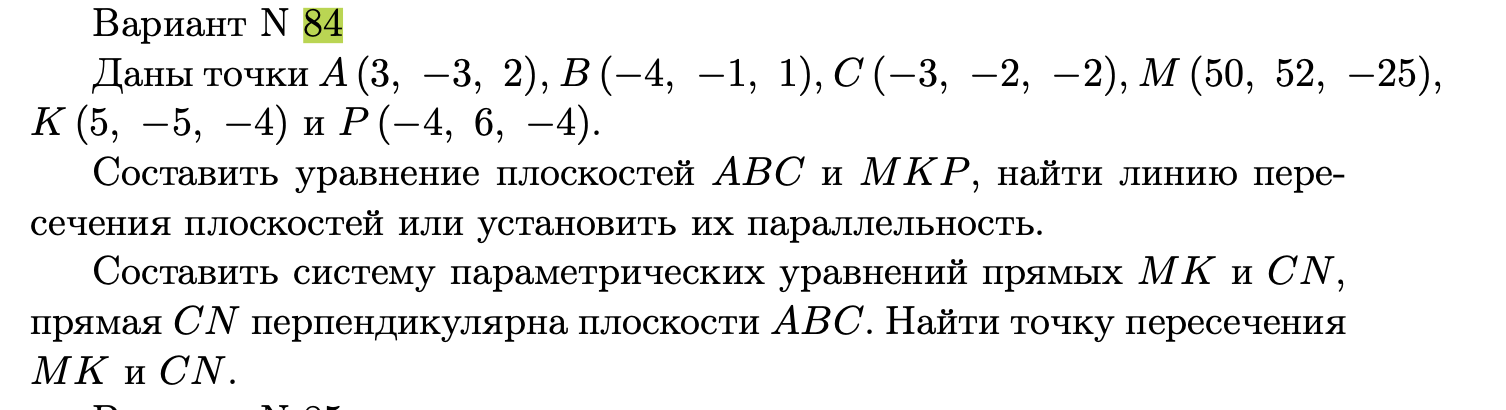

In [56]:
x, y, z = symbols("x y z")

A = Matrix([3, -3, 2]).transpose()
B = Matrix([-4, -1, 1]).transpose()
C = Matrix([-3, -2, -2]).transpose()

M = Matrix([50, 52, -25]).transpose()
K = Matrix([5, -5, -4]).transpose()
P = Matrix([-4, 6, -4]).transpose()

M1 = Matrix([A, B, C])

M1 = M1.row_join(ones(3, 1) * -1)

A, B, C, D = symbols("A B C D")
A, B, C, D = list(linsolve(M1, (A, B, C, D)).subs(D, 1))[0]

eq1 = Eq(A*x + B*y + C*z + D, 0)
print("Equation of plane ABC:")
display(eq1)

M2 = Matrix([M, K, P])

M2 = M2.row_join(ones(3, 1) * -1)

A, B, C, D = symbols("A B C D")
A, B, C, D = list(linsolve(M2, (A, B, C, D)).subs(D, 1))[0]

eq2 = Eq(A*x + B*y + C*z + D, 0)
print("Equation of plane MKP:")
display(eq2)

t = symbols("t")

A, B, C = symbols("A B C")
sys = list(linsolve([eq1, eq2], (x, y, z)).subs(z, t))[0]

print("Equation of line of intersection:")
display(*[
    Eq(x, sys[0]),
    Eq(y, sys[1]),
    Eq(z, sys[2])
])

sys = Matrix([
    2 + 5*t,
    -1 - 2*t,
    4 - 3*t,
])

Equation of plane ABC:


Eq(7*x/55 + 2*y/5 - z/11 + 1, 0)

Equation of plane MKP:


Eq(11*x/182 + 9*y/182 + 24*z/91 + 1, 0)

Equation of line of intersection:


Eq(x, -1101*t/179 - 3509/179)

Eq(y, 391*t/179 + 669/179)

Eq(z, t)

In [64]:
A = Matrix([3, -3, 2]).transpose()
B = Matrix([-4, -1, 1]).transpose()
C = Matrix([-3, -2, -2]).transpose()

M = Matrix([50, 52, -25]).transpose()
K = Matrix([5, -5, -4]).transpose()
P = Matrix([-4, 6, -4]).transpose()

t = symbols("t")
x, y, z = symbols("x y z")

sys1 = [
  Eq(x, M[0] + (K[0] - M[0]) * t),
  Eq(y, M[1] + (K[1] - M[1]) * t),
  Eq(z, M[2] + (K[2] - M[2]) * t),
]

display(*sys1)

V = Matrix([S(7)/55, S(2)/5, -S(1)/11]).transpose()
N = V + C

sys2 = [
  Eq(x, C[0] + (N[0] - C[0]) * t),
  Eq(y, C[1] + (N[1] - C[1]) * t),
  Eq(z, C[2] + (N[2] - C[2]) * t),
]

display(*sys2)

sys = sys1 + sys2
sol = linsolve(sys, t)
display(sol)

Eq(x, 50 - 45*t)

Eq(y, 52 - 57*t)

Eq(z, 21*t - 25)

Eq(x, 7*t/55 - 3)

Eq(y, 2*t/5 - 2)

Eq(z, -t/11 - 2)

EmptySet